In [1]:
!pwd

/home/shivam/nuc_seg/cellvit/CellViT-main/CellViT-main


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path0= '/home/shivam/nuc_seg/cellvit/CellViT-main/CellViT-main/configs/datasets/PanNuke/fold0/cell_count.csv'
path1= '/home/shivam/nuc_seg/cellvit/CellViT-main/CellViT-main/configs/datasets/PanNuke/fold1/cell_count.csv'
path2= '/home/shivam/nuc_seg/cellvit/CellViT-main/CellViT-main/configs/datasets/PanNuke/fold2/cell_count.csv'

fold0_df = pd.read_csv(path0)
fold0_df.head()

,Image,Neoplastic,Inflammatory,Connective,Dead,Epithelial
0,0_0.png,4,2,2,0,0
1,0_1.png,8,1,1,0,0
2,0_10.png,17,0,1,0,0
3,0_100.png,10,0,11,0,0
4,0_1000.png,0,0,2,0,0


        Neoplastic  Inflammatory   Connective         Dead   Epithelial
count  2656.000000   2656.000000  2656.000000  2656.000000  2656.000000
mean      9.864834      4.073795     6.170181     0.364081     3.329066
std      13.843142     12.822290     8.019634     3.597181     8.776368
min       0.000000      0.000000     0.000000     0.000000     0.000000
25%       0.000000      0.000000     1.000000     0.000000     0.000000
50%       3.000000      1.000000     4.000000     0.000000     0.000000
75%      16.000000      3.000000     9.000000     0.000000     0.000000
max     119.000000    193.000000   104.000000    68.000000    68.000000

26201
10820
10820
967
8842

Neoplastic      41.445474
Inflammatory    17.115379
Connective      25.922997
Dead             1.529628
Epithelial      13.986523
dtype: float64

Number of rows with zero total cells: 116
Indices of rows with zero total cells: [166, 167, 168, 172, 175, 178, 181, 182, 185, 187, 483, 484, 572, 644, 685, 686, 687, 688, 689, 

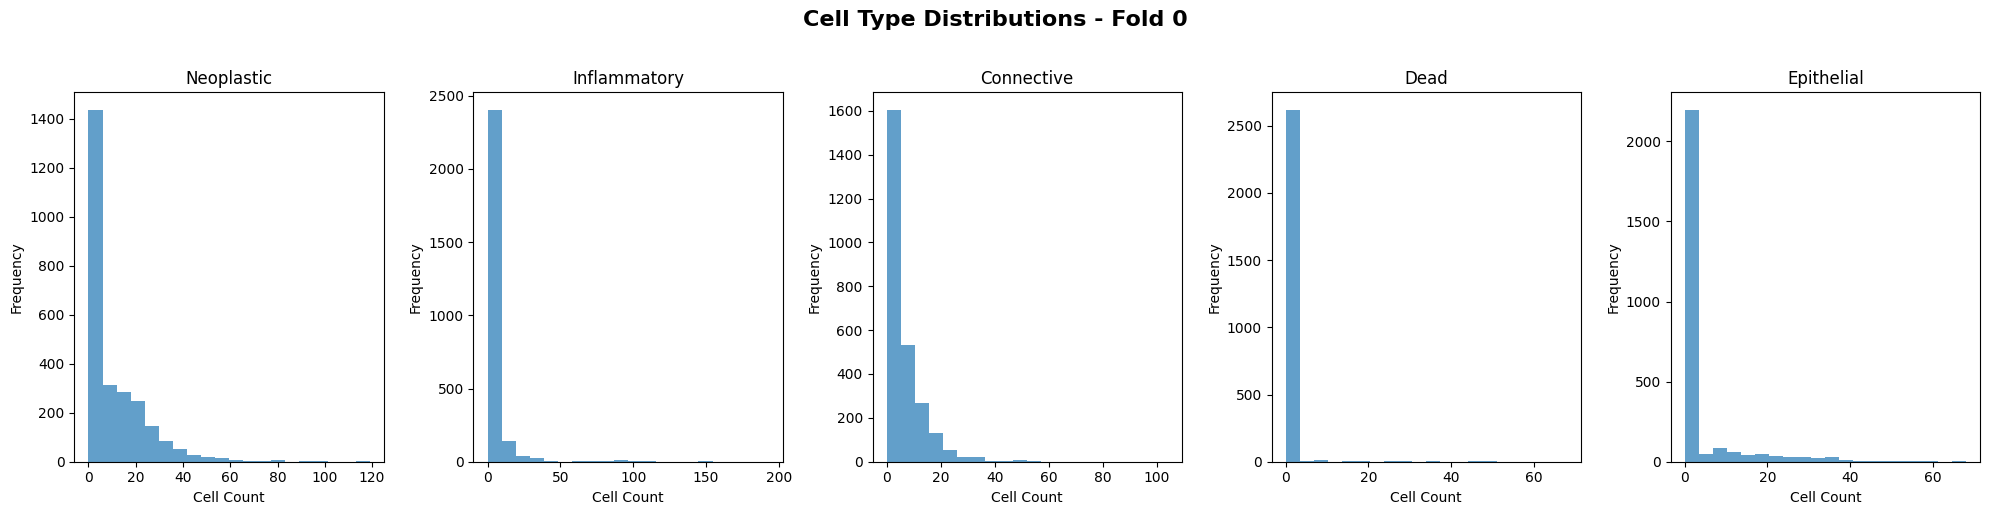

In [2]:
print(fold0_df.describe())
print()
print(fold0_df['Neoplastic'].sum())
print(fold0_df['Inflammatory'].sum())
print(fold0_df['Inflammatory'].sum())
print(fold0_df['Dead'].sum())
print(fold0_df['Epithelial'].sum())
print()
cell_types = ['Neoplastic', 'Inflammatory', 'Connective', 'Dead', 'Epithelial']

total_cells = fold0_df[cell_types].sum().sum()
percentages = (fold0_df[cell_types].sum() / total_cells) * 100
print(percentages)
print()
fold0_sum = fold0_df['Neoplastic'] + fold0_df['Inflammatory'] + fold0_df['Connective']+ fold0_df['Dead']+ fold0_df['Epithelial']

# 1. Count the number of rows with zero value
zero_count = (fold0_sum == 0).sum()
print(f"Number of rows with zero total cells: {zero_count}")

# 2. Find the locations (indices) where sum = 0
zero_indices = fold0_sum[fold0_sum == 0].index.tolist()
print(f"Indices of rows with zero total cells: {zero_indices}")

# 4. Alternative: Using numpy to find indices
# zero_indices_np = np.where(fold0_sum == 0)[0]
# print(f"\nUsing numpy - zero indices: {zero_indices_np}")

# 5. Get the image names where sum = 0
zero_image_names = fold0_df.loc[fold0_sum == 0, 'Image'].tolist()
print(f"\nImage names with zero total cells: {zero_image_names}")

# 6. Percentage of zero-sum rows
percentage_zero = (zero_count / len(fold0_sum)) * 100
print(f"\nPercentage of images with zero cells: {percentage_zero:.2f}%")

print(fold0_df['Image'][np.argmin(fold0_sum)],'--> has ', min(fold0_sum), 'nucleus')
print(fold0_df['Image'][np.argmax(fold0_sum)],'--> has ', max(fold0_sum), 'nucleus')

plt.figure(figsize=(20, 5))
for i, cell_type in enumerate(cell_types):
    row, col = divmod(i+1, 3)
    plt.subplot(1,5,i+1)
    plt.hist(fold0_df[cell_type], bins=20, alpha=0.7, label=cell_type)
    plt.title(f'{cell_type}')
    plt.xlabel('Cell Count')
    plt.ylabel('Frequency')

plt.subplots_adjust(wspace=0.4, hspace=0.3)  # Increase wspace for horizontal spacing
plt.suptitle('Cell Type Distributions - Fold 0', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [3]:
41.445474+17.115379+25.922997+1.529628+13.986523

100.000001

        Neoplastic  Inflammatory   Connective         Dead   Epithelial
count  2523.000000   2523.000000  2523.000000  2523.000000  2523.000000
mean      9.009512      4.213635     6.641300     0.350377     3.515656
std      14.291291     12.833835     8.251316     3.475887     8.848225
min       0.000000      0.000000     0.000000     0.000000     0.000000
25%       0.000000      0.000000     1.000000     0.000000     0.000000
50%       1.000000      1.000000     4.000000     0.000000     0.000000
75%      15.000000      3.000000    10.000000     0.000000     0.000000
max     125.000000    225.000000    89.000000    75.000000    68.000000

22731
10631
10631
884
8870

Neoplastic      37.965994
Inflammatory    17.756213
Connective      27.986371
Dead             1.476483
Epithelial      14.814939
dtype: float64

1_1028.png --> has  0 nucleus
1_932.png --> has  289 nucleus
Number of rows with zero total cells: 113
Indices of rows with zero total cells: [34, 35, 271, 278, 279, 451, 452, 4

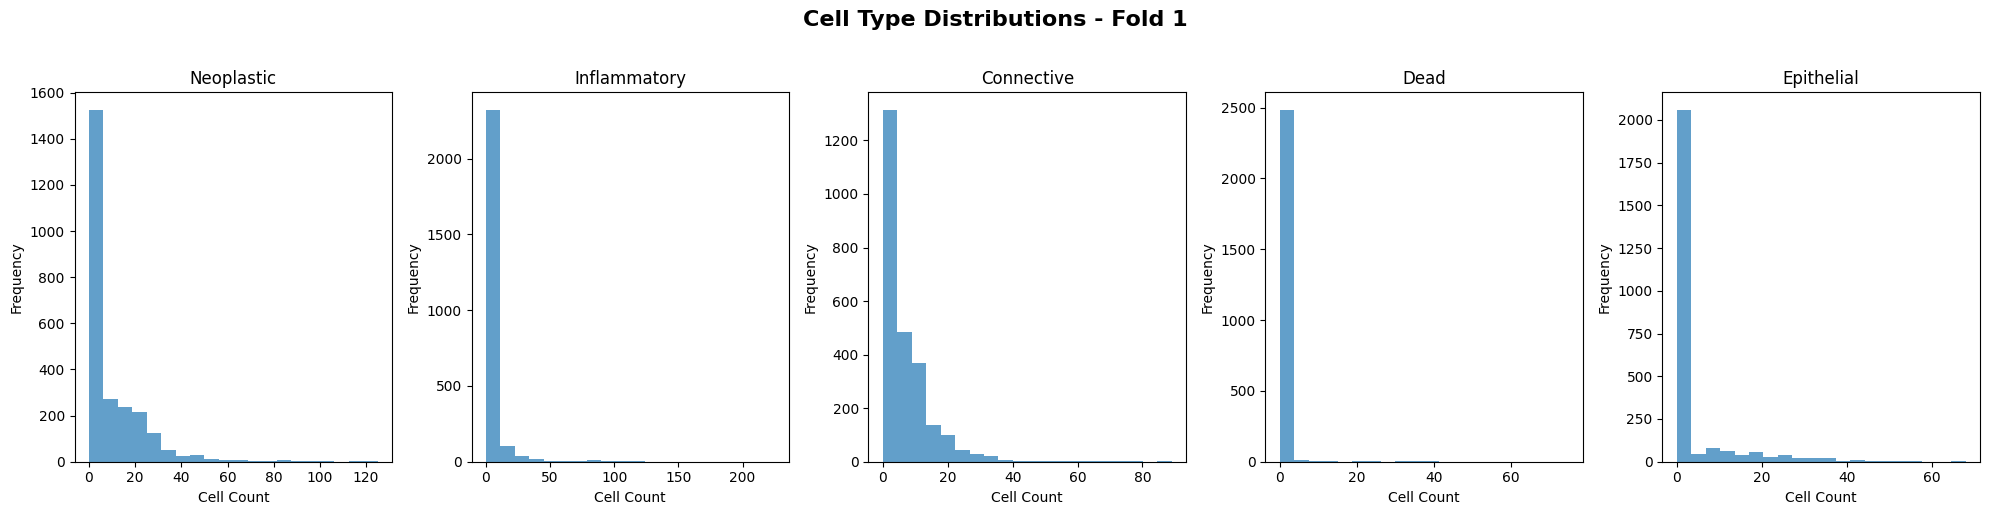

In [6]:
fold1_df = pd.read_csv(path1)
print(fold1_df.describe())
print()
print(fold1_df['Neoplastic'].sum())
print(fold1_df['Inflammatory'].sum())
print(fold1_df['Inflammatory'].sum())
print(fold1_df['Dead'].sum())
print(fold1_df['Epithelial'].sum())
print()

cell_types = ['Neoplastic', 'Inflammatory', 'Connective', 'Dead', 'Epithelial']
total_cells = fold1_df[cell_types].sum().sum()
percentages = (fold1_df[cell_types].sum() / total_cells) * 100
print(percentages)
print()
fold1_sum = fold1_df['Neoplastic'] + fold1_df['Inflammatory'] + fold1_df['Connective']+ fold1_df['Dead']+ fold1_df['Epithelial']

print(fold1_df['Image'][np.argmin(fold1_sum)],'--> has ', min(fold1_sum), 'nucleus')
print(fold1_df['Image'][np.argmax(fold1_sum)],'--> has ', max(fold1_sum), 'nucleus')

# 1. Count the number of rows with zero value
zero_count = (fold1_sum == 0).sum()
print(f"Number of rows with zero total cells: {zero_count}")

# 2. Find the locations (indices) where sum = 0
zero_indices = fold1_sum[fold1_sum == 0].index.tolist()
print(f"Indices of rows with zero total cells: {zero_indices}")

# 4. Alternative: Using numpy to find indices
# zero_indices_np = np.where(fold0_sum == 0)[0]
# print(f"\nUsing numpy - zero indices: {zero_indices_np}")

# 5. Get the image names where sum = 0
zero_image_names = fold1_df.loc[fold1_sum == 0, 'Image'].tolist()
print(f"\nImage names with zero total cells: {zero_image_names}")

# 6. Percentage of zero-sum rows
percentage_zero = (zero_count / len(fold1_sum)) * 100
print(f"\nPercentage of images with zero cells: {percentage_zero:.2f}%")

plt.figure(figsize=(20, 5))
for i, cell_type in enumerate(cell_types):
    row, col = divmod(i+1, 3)
    plt.subplot(1,5,i+1)
    plt.hist(fold1_df[cell_type], bins=20, alpha=0.7, label=cell_type)
    plt.title(f'{cell_type}')
    plt.xlabel('Cell Count')
    plt.ylabel('Frequency')

plt.subplots_adjust(wspace=0.4, hspace=0.3)  # Increase wspace for horizontal spacing
plt.suptitle('Cell Type Distributions - Fold 1', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

        Neoplastic  Inflammatory   Connective         Dead   Epithelial
count  2722.000000   2722.000000  2722.000000  2722.000000  2722.000000
mean     10.459589      3.976855     6.407421     0.388317     3.254960
std      15.400736     12.063527     8.395698     3.400529     8.879301
min       0.000000      0.000000     0.000000     0.000000     0.000000
25%       0.000000      0.000000     1.000000     0.000000     0.000000
50%       2.000000      1.000000     4.000000     0.000000     0.000000
75%      17.000000      3.000000     9.000000     0.000000     0.000000
max     122.000000    141.000000   106.000000    75.000000    70.000000

28471
10825
10825
1057
8860

Neoplastic      42.714616
Inflammatory    16.240586
Connective      26.166472
Dead             1.585801
Epithelial      13.292526
dtype: float64

2_1016.png --> has  0 nucleus
2_1005.png --> has  214 nucleus
Number of rows with zero total cells: 114
Indices of rows with zero total cells: [21, 87, 89, 90, 95, 97, 100, 344

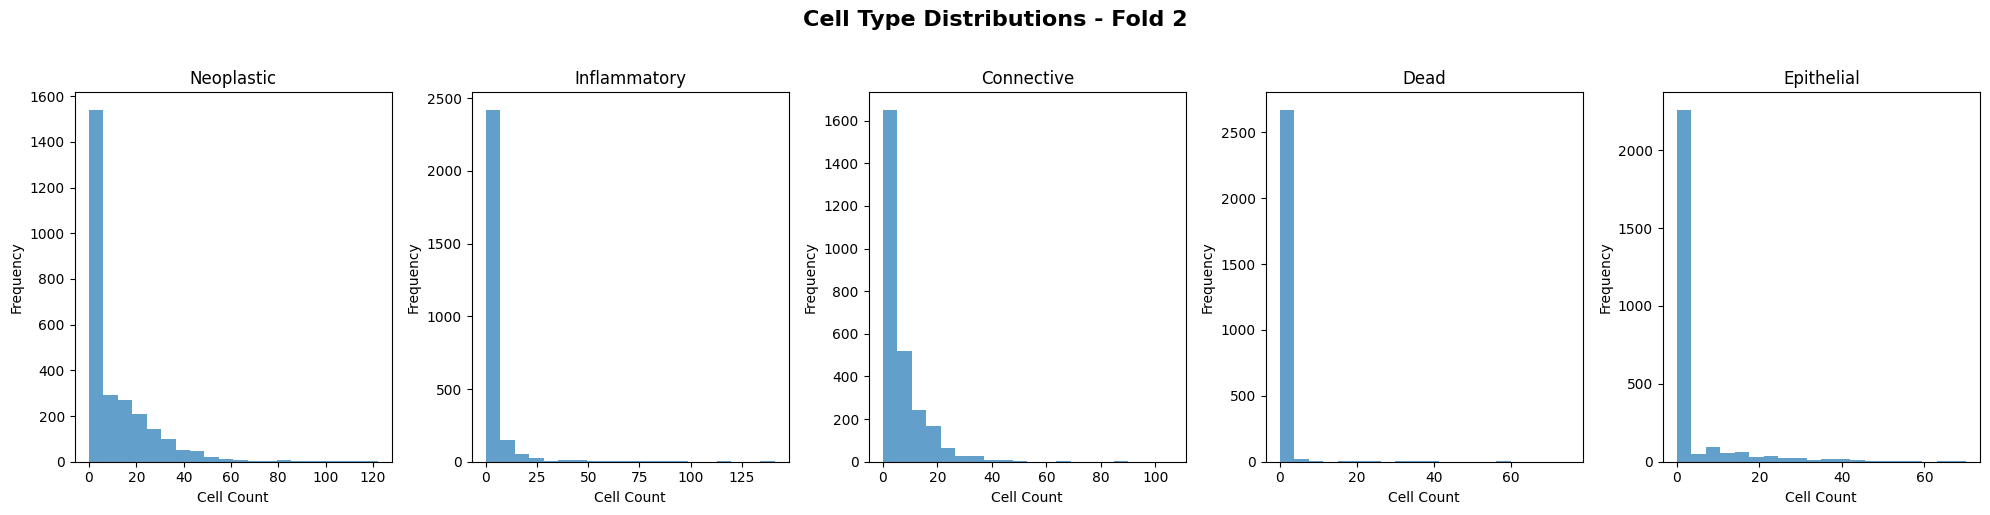

In [5]:
fold2_df = pd.read_csv(path2)
print(fold2_df.describe())
print()
print(fold2_df['Neoplastic'].sum())
print(fold2_df['Inflammatory'].sum())
print(fold2_df['Inflammatory'].sum())
print(fold2_df['Dead'].sum())
print(fold2_df['Epithelial'].sum())
print()

cell_types = ['Neoplastic', 'Inflammatory', 'Connective', 'Dead', 'Epithelial']
total_cells = fold2_df[cell_types].sum().sum()
percentages = (fold2_df[cell_types].sum() / total_cells) * 100
print(percentages)

fold2_sum = fold2_df['Neoplastic'] + fold2_df['Inflammatory'] + fold2_df['Connective']+ fold2_df['Dead']+ fold2_df['Epithelial']
print()

print(fold2_df['Image'][np.argmin(fold2_sum)],'--> has ', min(fold2_sum), 'nucleus')
print(fold2_df['Image'][np.argmax(fold2_sum)],'--> has ', max(fold2_sum), 'nucleus')

# 1. Count the number of rows with zero value
zero_count = (fold2_sum == 0).sum()
print(f"Number of rows with zero total cells: {zero_count}")

# 2. Find the locations (indices) where sum = 0
zero_indices = fold2_sum[fold2_sum == 0].index.tolist()
print(f"Indices of rows with zero total cells: {zero_indices}")

# 4. Alternative: Using numpy to find indices
# zero_indices_np = np.where(fold0_sum == 0)[0]
# print(f"\nUsing numpy - zero indices: {zero_indices_np}")

# 5. Get the image names where sum = 0
zero_image_names = fold2_df.loc[fold2_sum == 0, 'Image'].tolist()
print(f"\nImage names with zero total cells: {zero_image_names}")

# 6. Percentage of zero-sum rows
percentage_zero = (zero_count / len(fold2_sum)) * 100
print(f"\nPercentage of images with zero cells: {percentage_zero:.2f}%")


plt.figure(figsize=(20, 5))
for i, cell_type in enumerate(cell_types):
    row, col = divmod(i+1, 3)
    plt.subplot(1,5,i+1)
    plt.hist(fold2_df[cell_type], bins=20, alpha=0.7, label=cell_type)
    plt.title(f'{cell_type}')
    plt.xlabel('Cell Count')
    plt.ylabel('Frequency')

plt.subplots_adjust(wspace=0.4, hspace=0.3)  # Increase wspace for horizontal spacing
plt.suptitle('Cell Type Distributions - Fold 2', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()